# **EDA Precios de Laptops**

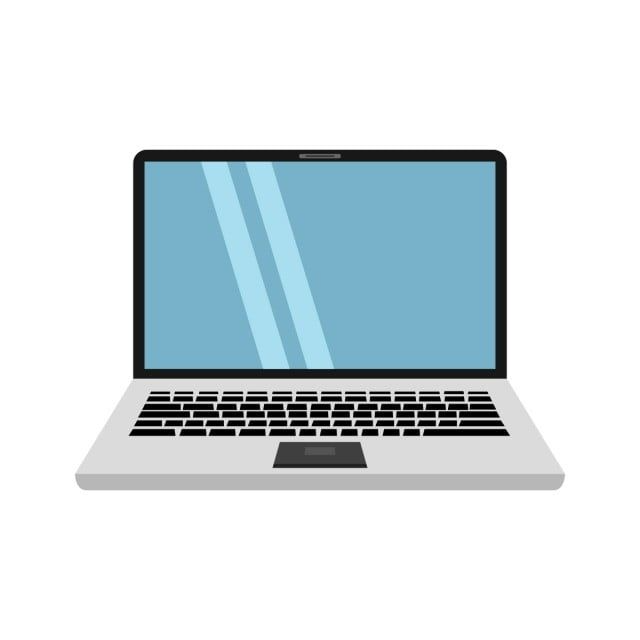

### **Presentación**

https://www.canva.com/design/DAGT4ITakyM/9EV137qCJPJmP6TXG5Lchg/view?utm_content=DAGT4ITakyM&utm_campaign=designshare&utm_medium=link&utm_source=editor#6

**Abstracto con motivación y Audiencia**

El mercado de laptops ofrece una gran variedad de modelos con diferentes características y precios. Este análisis utiliza un conjunto de datos de Kaggle.com para identificar las características más importantes que influyen en el precio de una laptop, como la marca, procesador, almacenamiento y RAM.

La motivación de este proyecto es ayudar tanto a consumidores como a fabricantes a entender mejor cómo se valoran las laptops y a tomar decisiones más informadas. Con esta investigación, buscamos identificar qué factores son clave al fijar precios y si existen diferencias significativas en la relación entre precio y calidad.

Este análisis está dirigido a cualquier persona interesada en comprender más a fondo el mercado de laptops, incluyendo consumidores que buscan tomar decisiones informadas al comprar, así como fabricantes y distribuidores de tecnología

**Contexto Comercial y Analítico**

En el competitivo mercado de laptops, surge la necesidad de comprender qué características técnicas impactan directamente en su valor comercial. Esta información es crucial tanto para los fabricantes como para los distribuidores, quienes buscan optimizar sus estrategias de precios y producción para satisfacer la demanda del mercado. También es relevante para los consumidores, que desean obtener el mejor valor por su inversión.

El conjunto de datos utilizado contiene información sobre 22 características de cada laptop, incluidas la marca, el tipo de procesador, el almacenamiento, la memoria RAM etc.

Este análisis busca descubrir qué factores explican las variaciones de precio y cuáles son más valorados según el tipo de laptop, ofreciendo información clave para mejorar las decisiones en diseño y pricing.

**Hipótesis**

- ¿Qué características influyen en el precio de una laptop?
- ¿Cómo puedo identificar qué tipo de laptop corresponde a cada modelo?
- ¿Hay laptops cuyo precio no refleja adecuadamente sus características?

**Column Descriptions**

Company: Fabricante de laptops.

Product: Marca y modelo.

TypeName: Tipo de laptop (Notebook, Ultrabook, Gaming, etc.).

Inches: Tamaño de la pantalla.

Ram:Cantidad total de RAM en la laptop (GB).

OS: Sistema operativo instalado.

Weight: Peso de la laptop en kilogramos.

Price_euros: Precio de la laptop en euros. (Objetivo)

Screen: Definición de la pantalla (Estándar, Full HD, 4K Ultra HD, Quad HD+).

ScreenW: Ancho de la pantalla (píxeles).

ScreenH: Alto de la pantalla (píxeles).

Touchscreen: Si la laptop tiene pantalla táctil o no.

IPSpanel: Si la laptop tiene panel IPS o no.

RetinaDisplay: Si la laptop tiene pantalla Retina o no.

CPU_company: Nombre de la empresa que fabrica el procesador de la laptop (por ejemplo, Intel, AMD).

CPU_freq: Frecuencia del CPU de la laptop (Hz).

CPU_model: Modelo específico del procesador de la laptop (por ejemplo, Intel Core i7-10750H).

PrimaryStorage: Espacio de almacenamiento primario (GB).

PrimaryStorageType: Tipo de almacenamiento primario (HDD, SSD, Almacenamiento Flash, Híbrido).

SecondaryStorage: Espacio de almacenamiento secundario si lo tiene (GB).

SecondaryStorageType: Tipo de almacenamiento secundario (HDD, SSD, Híbrido, Ninguno).

GPU_company: Nombre de la empresa que fabrica la tarjeta gráfica (por ejemplo, NVIDIA, AMD).

GPU_model: Modelo específico de la tarjeta gráfica en la laptop (por ejemplo, NVIDIA GeForce GTX 1660 Ti).


**Fuente**

https://www.kaggle.com/datasets/muhammetvarl/laptop-price/

### **Importación de librerías**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)  # Muestra todas las columnas

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **Lectura de datos**

In [28]:
df = pd.read_csv(r'C:\Users\juanc\Documents\Data Science\EDA-LaptopPrices\Data\laptop_prices.csv')

In [29]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
847,Asus,ZenBook UX310UQ-GL026T,Ultrabook,13.3,8,Windows 10,1.45,1026.0,Full HD,1920,1080,No,Yes,No,Intel,2.3,Core i5 6200U,512,0,SSD,No,Nvidia,GeForce 940M
51,Acer,Aspire A515-51G,Notebook,15.6,8,Windows 10,2.20,841.0,Full HD,1920,1080,No,Yes,No,Intel,1.8,Core i7 8550U,256,0,SSD,No,Nvidia,GeForce MX150
259,Lenovo,Yoga 720-15IKB,2 in 1 Convertible,15.6,8,Windows 10,2.00,1699.0,Full HD,1920,1080,Yes,Yes,No,Intel,2.8,Core i7 7700HQ,512,0,SSD,No,Nvidia,GeForce GTX 1050M
184,Xiaomi,Mi Notebook,Notebook,15.6,8,No OS,1.95,1199.0,Full HD,1920,1080,No,Yes,No,Intel,1.6,Core i5 8250U,256,0,SSD,No,Nvidia,GeForce MX150
996,HP,Spectre 13-V111dx,Ultrabook,13.3,8,Windows 10,1.11,1349.0,Full HD,1920,1080,Yes,Yes,No,Intel,2.7,Core i7 7500U,256,0,SSD,No,Intel,HD Graphics 620
705,Dell,Vostro 5568,Notebook,15.6,8,Windows 10,2.18,795.0,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
995,Asus,ZenBook UX310UA-FB485T,Notebook,13.3,8,Windows 10,1.40,1150.0,Quad HD+,3200,1800,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
1042,Toshiba,Tecra A50-C-218,Notebook,15.6,16,Windows 10,2.40,1425.0,Full HD,1920,1080,No,Yes,No,Intel,2.5,Core i7 6500U,256,0,SSD,No,Nvidia,GeForce 930M
485,Lenovo,ThinkPad E480,Notebook,14.0,8,Windows 10,1.75,1049.0,Full HD,1920,1080,No,Yes,No,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620
1148,HP,EliteBook 850,Notebook,15.6,8,Windows 7,1.88,1579.0,Full HD,1920,1080,No,No,No,Intel,2.3,Core i5 6200U,256,0,SSD,No,Intel,HD Graphics 520


In [30]:
df.shape

(1275, 23)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    Company              1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

### **Data Wrangling**

In [32]:
df.duplicated().sum()

0

In [33]:
df.isnull().sum()

 Company                0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [34]:
df.dtypes.value_counts()

object     14
int64       5
float64     4
Name: count, dtype: int64

In [35]:
df.columns = df.columns.str.strip()

In [36]:
df[['Touchscreen', 'IPSpanel', 'RetinaDisplay']] = df[['Touchscreen', 'IPSpanel', 'RetinaDisplay']].replace('Yes',1)
df[['Touchscreen', 'IPSpanel', 'RetinaDisplay']] = df[['Touchscreen', 'IPSpanel', 'RetinaDisplay']].replace('No',0)

In [37]:
df.sample(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
515,Asus,VivoBook E12,Netbook,11.6,2,Windows 10,1.10,245.0,Standard,1366,768,0,0,0,Intel,1.1,Celeron Dual Core N3350,32,0,Flash Storage,No,Intel,HD Graphics 500
866,Toshiba,Portégé Z30-C-188,Ultrabook,13.3,8,Windows 10,1.20,1095.0,Standard,1366,768,0,0,0,Intel,2.3,Core i5 6200U,256,0,SSD,No,Intel,HD Graphics 520
673,Lenovo,IdeaPad 320-15AST,Notebook,15.6,4,Windows 10,2.20,349.0,Standard,1366,768,0,0,0,AMD,2.2,E-Series E2-9000,128,0,SSD,No,AMD,Radeon R2 Graphics
730,Acer,Predator 17,Gaming,17.3,16,Windows 10,4.20,1935.0,Full HD,1920,1080,0,1,0,Intel,2.6,Core i7 6700HQ,128,1024,SSD,HDD,Nvidia,GeForce GTX 1060
1206,HP,15-bs025nv (i5-7200U/8GB/256GB/W10),Notebook,15.6,8,Windows 10,1.91,579.0,Standard,1366,768,0,0,0,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620


In [38]:
df.dtypes.value_counts()


object     11
int64       8
float64     4
Name: count, dtype: int64

### **EDA**

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1275.0,15.022902,1.429470,10.10,14.0,15.60,15.60,18.4
Ram,1275.0,8.440784,5.097809,2.00,4.0,8.00,8.00,64.0
Weight,1275.0,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7
Price_euros,1275.0,1134.969059,700.752504,174.00,609.0,989.00,1496.50,6099.0
ScreenW,1275.0,1900.043922,493.346186,1366.00,1920.0,1920.00,1920.00,3840.0
ScreenH,1275.0,1073.904314,283.883940,768.00,1080.0,1080.00,1080.00,2160.0
Touchscreen,1275.0,0.147451,0.354694,0.00,0.0,0.00,0.00,1.0
IPSpanel,1275.0,0.280000,0.449175,0.00,0.0,0.00,1.00,1.0
RetinaDisplay,1275.0,0.013333,0.114743,0.00,0.0,0.00,0.00,1.0
CPU_freq,1275.0,2.302980,0.503846,0.90,2.0,2.50,2.70,3.6


In [40]:
print('Q1',len(df) * 0.25)
print('Q2',len(df) * 0.50)
print('Q3',len(df) * 0.75)

Q1 318.75
Q2 637.5
Q3 956.25


**Distribucion de precios**

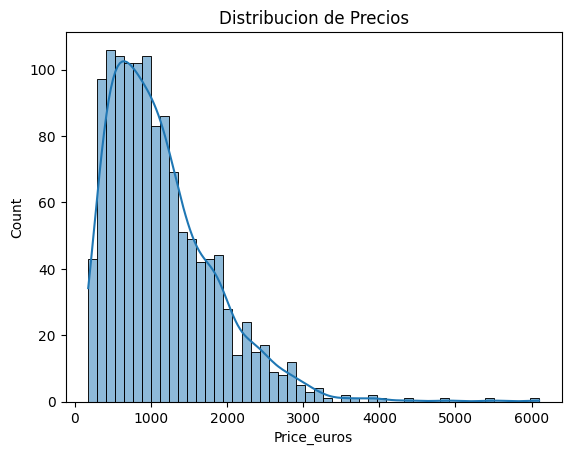

Pecios bajos predominan: La mayoría de las laptops tienen precios entre 500 y 1500 euros y la distribucion de laptops está sesgada hacia precios más bajos lo que nos dice que las laptops con precios bajos predominan en cantidad.


In [41]:
fig, ax = plt.subplots()

# Histogram
sns.histplot(df['Price_euros'], kde=True, bins=50)
plt.title('Distribucion de Precios')
plt.show()
# print('Este histograma nos muestra la distribución de los precios de las laptops. Podemos obserbar una asimetría hacia la derecha lo que indica una distribución sesgada hacia los precios más bajos. También podemos ver que la mayoría de las laptops tienen precios entre 500 y 1500 euros.')
print('''Pecios bajos predominan: La mayoría de las laptops tienen precios entre 500 y 1500 euros y la distribucion de laptops está sesgada hacia precios más bajos lo que nos dice que las laptops con precios bajos predominan en cantidad.''')

**Correlación de las variables entre si**

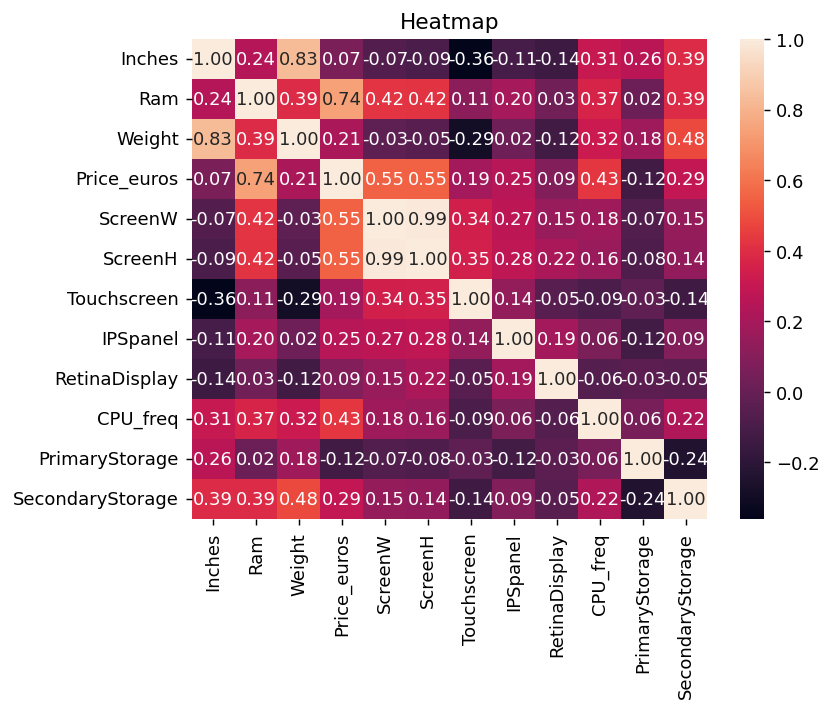

In [42]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


# Calculate correlation matrix for numerical columns
corr = df[numerical_columns].corr()

# Heatmat
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Heatmap')
plt.show()

**Variantes que suben el precio de una laptop**

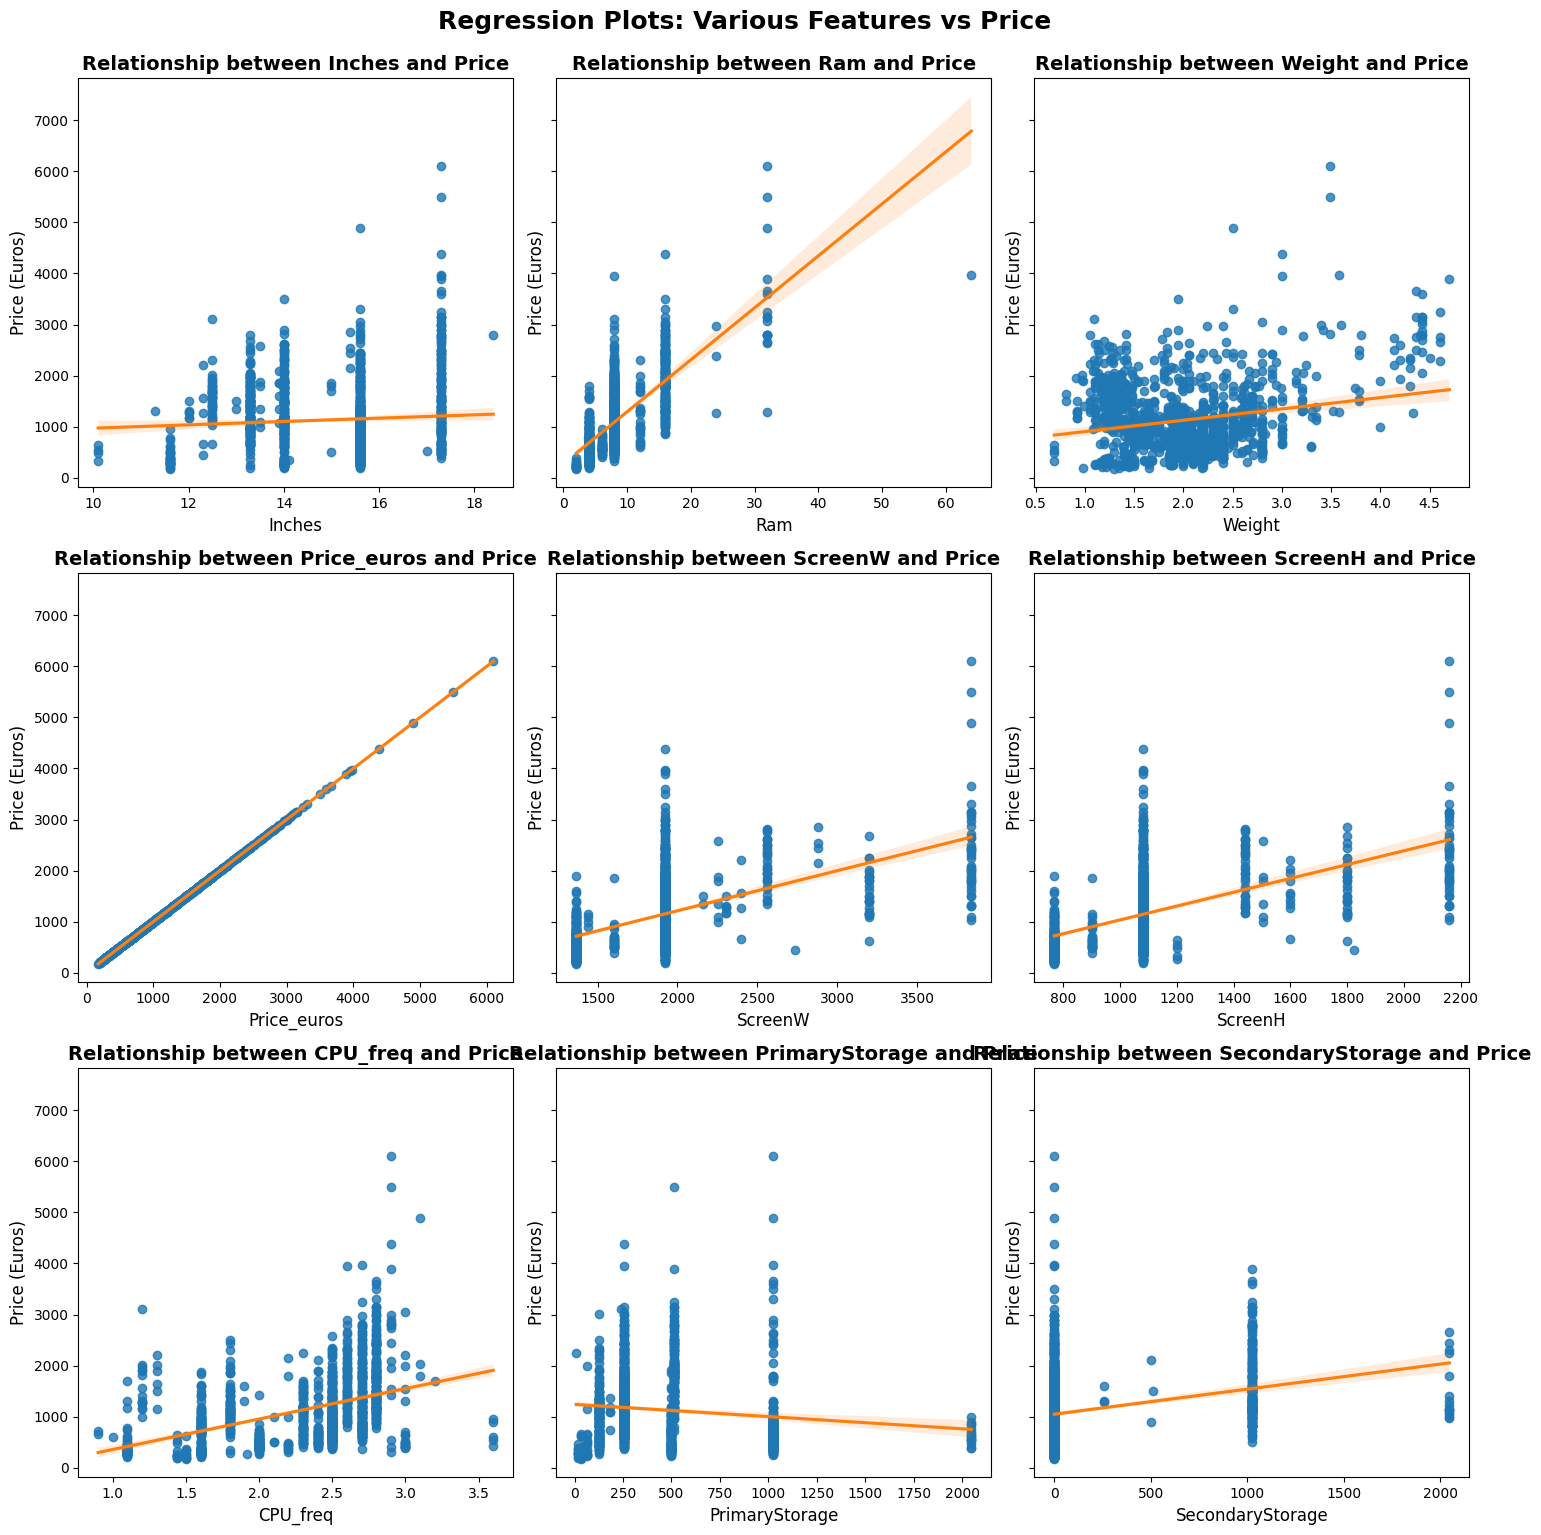

Podemos encontrar una claras regresiones positivas entre los Pecios de las Laptops y la memoria RAM, Resolución de pantalla (ScreenW y ScreenH) y Frecuencia del procesador. Esto indica que mediante estos valores aumenten el precio también lo hará


In [43]:
columns = numerical_columns.drop(['Touchscreen', 'IPSpanel', 'RetinaDisplay'])

fig, ax = plt.subplots(3, 3, figsize=(15, 15), sharey=True)

# Aplanar la matriz de ejes para un acceso más sencillo
ax = ax.ravel()

# Iterar sobre las columnas y crear un gráfico para cada una
for i, col in enumerate(columns):
    sns.regplot(data=df, x=col, y='Price_euros', line_kws={'color': 'C1'}, ax=ax[i])
    
    # Añadir título a cada subplot
    ax[i].set_title(f'Relationship between {col} and Price', fontsize=14, weight='bold')
    
    # Ajustar etiquetas de los ejes
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Price (Euros)', fontsize=12)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Añadir un título general al gráfico
fig.suptitle('Regression Plots: Various Features vs Price', fontsize=18, weight='bold', y=1.02)

columns = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']

# Mostrar todos los gráficos
plt.show()
print('''Podemos encontrar una claras regresiones positivas entre los Pecios de las Laptops y la memoria RAM, Resolución de pantalla (ScreenW y ScreenH) y Frecuencia del procesador. Esto indica que mediante estos valores aumenten el precio también lo hará''')


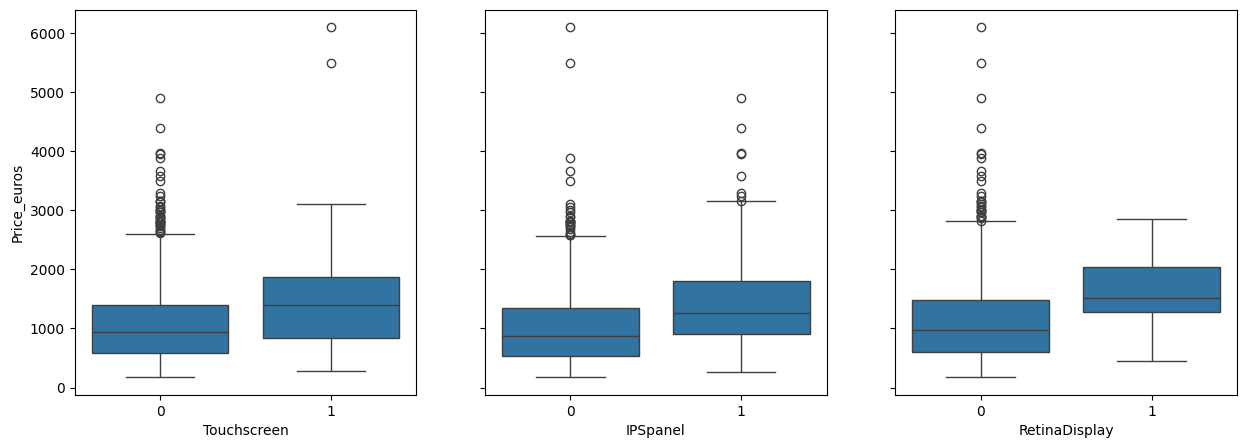

Estos boxplot muestran que las laptops con pantalla táctil(Touchscreen), que incluyen un panel IPS(IPSpanel) y con pantalla Retina(RetinaDisplay) tinden a tener precios más altos que las que no tienen esta característica


In [44]:
columns = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, col in enumerate(columns):
    sns.boxplot(df, x=col, y='Price_euros', ax=ax[i])
plt.show()
print('Estos boxplot muestran que las laptops con pantalla táctil(Touchscreen), que incluyen un panel IPS(IPSpanel) y con pantalla Retina(RetinaDisplay) tinden a tener precios más altos que las que no tienen esta característica')

**Compañia de GPU más utilizadas**

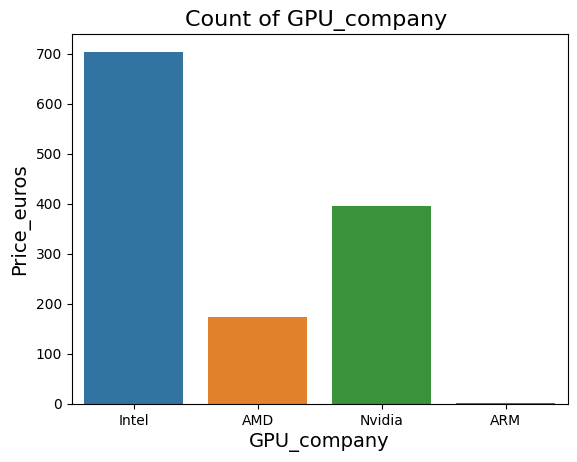

El gráfico de barras muestra la cantidad de laptops agrupadas por la compañía fabricante de la GPU (tarjeta gráfica). Podemos ver qué fabricantes son más comunes en el dataset. Aunque el gráfico refleja la cantidad de laptops por fabricante, no parece estar directamente relacionado con el precio promedio, ya que la métrica utilizada cuenta el número de laptops, no el valor de los precios. Esto sugiere que algunos fabricantes dominan el mercado en términos de volumen, pero no necesariamente en precio. Las compañías más representadas (según el gráfico) parecen ser las que ofrecen tarjetas gráficas más comunes, lo que podría reflejar la popularidad de estas marcas entre los usuarios de laptops.


In [45]:
sns.barplot(x='GPU_company', y='Price_euros', data=df, estimator=np.count_nonzero, hue='GPU_company')
plt.title('Count of GPU_company ',fontsize=16,c='k')
plt.xlabel('GPU_company',fontsize=14,c='k')
plt.ylabel('Price_euros',fontsize=14,c='k')
plt.show()
# print('Aquí podemos ver qué los fabricantes más comunes de targetas graficas son Intel y Nvidia. ')
print('''El gráfico de barras muestra la cantidad de laptops agrupadas por la compañía fabricante de la GPU (tarjeta gráfica). Podemos ver qué fabricantes son más comunes en el dataset. Aunque el gráfico refleja la cantidad de laptops por fabricante, no parece estar directamente relacionado con el precio promedio, ya que la métrica utilizada cuenta el número de laptops, no el valor de los precios. Esto sugiere que algunos fabricantes dominan el mercado en términos de volumen, pero no necesariamente en precio. Las compañías más representadas (según el gráfico) parecen ser las que ofrecen tarjetas gráficas más comunes, lo que podría reflejar la popularidad de estas marcas entre los usuarios de laptops.''')

**Promedio de precios según tipo de laptop**

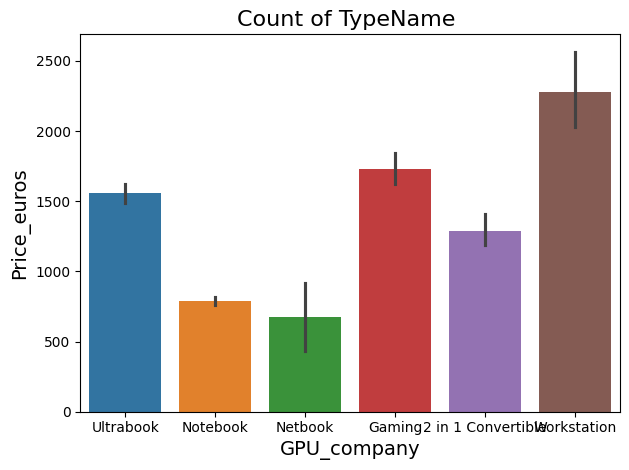

Podemos observar que algunos tipos, como los Gaming laptops, tienen precios significativamente más altos que otros, como los Notebooks.
El gráfico muestra claramente que el tipo de laptop es un factor determinante en su precio. Los Netbooks tienen precios más bajos, mientras que los modelos más especializados, como Workstations y Gaming laptops, tienden a ser más caros.


In [46]:
sns.barplot(x='TypeName', y='Price_euros', data=df, estimator=np.mean, hue='TypeName')
plt.title('Count of TypeName ',fontsize=16,c='k')
plt.xlabel('GPU_company',fontsize=14,c='k')
plt.ylabel('Price_euros',fontsize=14,c='k')
plt.tight_layout()
plt.show()
print('''Podemos observar que algunos tipos, como los Gaming laptops, tienen precios significativamente más altos que otros, como los Notebooks.
El gráfico muestra claramente que el tipo de laptop es un factor determinante en su precio. Los Netbooks tienen precios más bajos, mientras que los modelos más especializados, como Workstations y Gaming laptops, tienden a ser más caros.''')

**Preferencia de tipo de memoria**

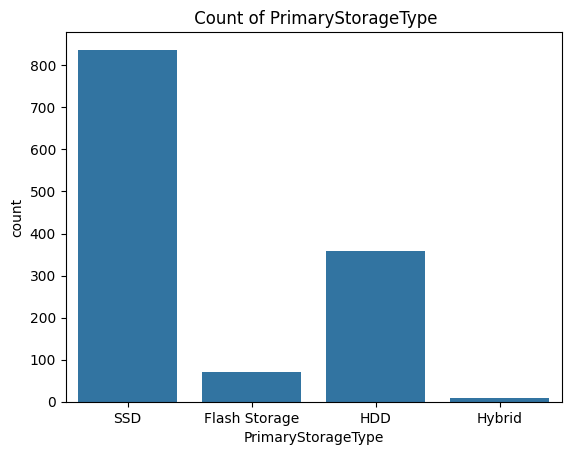

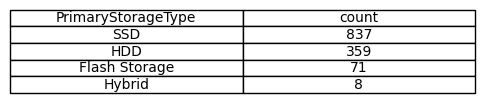

Aquí vemos como el almacenamiento SSD es el más común, lo que refleja la tendencia hacia dispositivos con almacenamiento más rápido y eficiente.


In [47]:
sns.countplot(data=df, x='PrimaryStorageType')
plt.title(' Count of PrimaryStorageType')

fig, ax = plt.subplots(figsize=(6, 1))
ax.axis('off')

count_table = df['PrimaryStorageType'].value_counts().reset_index()
table = ax.table(cellText=count_table.values, colLabels=count_table.columns, cellLoc='center', loc='center')
plt.show()
print('Aquí vemos como el almacenamiento SSD es el más común, lo que refleja la tendencia hacia dispositivos con almacenamiento más rápido y eficiente.')

**Marcas más costosas segun su tipo**

In [48]:
# Agrupar por 'TypeName' y 'Company', y calcular el promedio de 'Price_euros'
avg_company_type = df.groupby(['TypeName', 'Company'])['Price_euros'].mean()

# Ordenar los precios dentro de cada 'TypeName' en orden descendente
avg_company_type = avg_company_type.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))

pd.DataFrame(avg_company_type)

Price_euros
TypeName           Company               
2 in 1 Convertible Lenovo     1529.024545
                   HP         1506.810000
                   Samsung    1229.000000
                   Dell       1131.670333
                   Asus        976.385385
                   Acer        698.751250
                   Mediacom    299.000000
Gaming             Razer      4119.000000
                   Dell       1918.393000
                   MSI        1728.908148
                   Asus       1720.005370
                   Acer       1468.125000
                   HP         1424.083333
                   Lenovo     1328.968125
Netbook            HP         1234.571429
                   Lenovo      735.750000
                   Dell        519.500000
                   Acer        306.000000
                   Samsung     269.000000
                   Asus        266.200000
Notebook           Samsung    1699.000000
                   Xiaomi     1299.475000
                   Toshiba    1109.000000
                   Dell        883.150629
                   HP          820.174056
                   Lenovo      794.325402
                   Fujitsu     729.000000
                   Asus        632.336825
                   Acer        546.748684
                   Chuwi       314.296667
                   Mediacom    294.333333
                   Vero        217.425000
Ultrabook          LG         2099.000000
                   Lenovo     1794.919355
                   Toshiba    1744.250000
                   Google     1677.666667
                   Samsung    1659.000000
                   Microsoft  1612.308333
                   Apple      1564.198571
                   HP         1537.140556
                   Dell       1477.915714
                   Huawei     1424.000000
                   Razer      1414.000000
                   Asus       1352.600000
                   Xiaomi      967.450000
                   Acer        890.500000
Workstation        Lenovo     2381.000000
                   HP         2299.682143
                   Dell       2219.169091

**Preferencia de Sistema Operativo(OSS)**

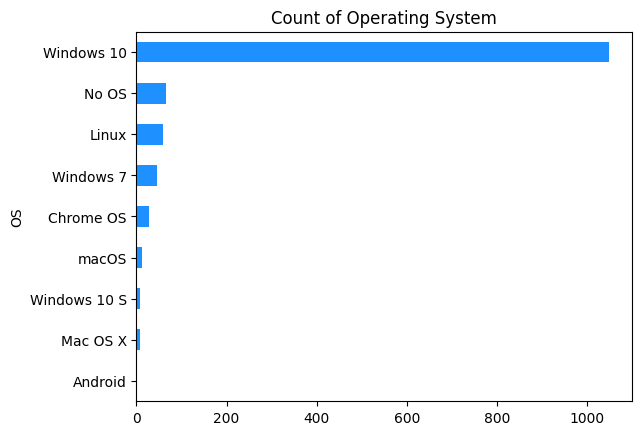

En este grafico se observa una clara preferencia por el Sistemas Operativo(OSS) Window 10


In [49]:
df['OS'].value_counts().sort_values(ascending=True).plot(kind='barh', color='dodgerblue')
plt.title('Count of Operating System')
plt.show()
print('En este grafico se observa una clara preferencia por el Sistemas Operativo(OSS) Window 10')

**RAM más demandadas**

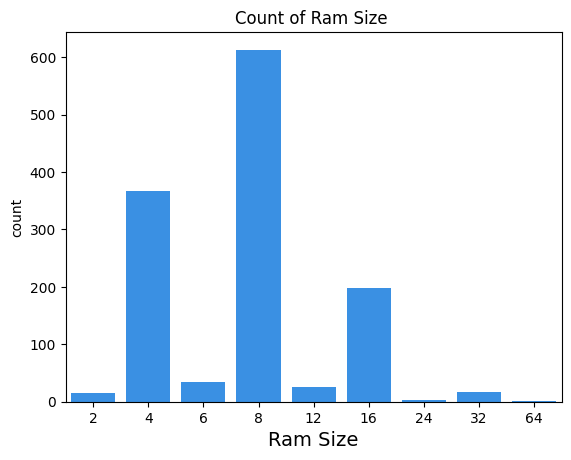

La mayoría de las laptops tienen 8 GB de RAM, lo que sugiere que es el estándar para laptops de uso general. Sin embargo, hay una cantidad significativa de modelos con 16 GB, lo que refleja la tendencia hacia laptops más potentes para tareas de alto rendimiento y una inclinacioón a modelos con 4 GB en laptops menos potentes.


In [50]:
sns.countplot(x='Ram',data=df, color='dodgerblue')
plt.title('Count of Ram Size ')
plt.xlabel('Ram Size',fontsize=14,color='k')
plt.show()
print('''La mayoría de las laptops tienen 8 GB de RAM, lo que sugiere que es el estándar para laptops de uso general. Sin embargo, hay una cantidad significativa de modelos con 16 GB, lo que refleja la tendencia hacia laptops más potentes para tareas de alto rendimiento y una inclinacioón a modelos con 4 GB en laptops menos potentes.''')

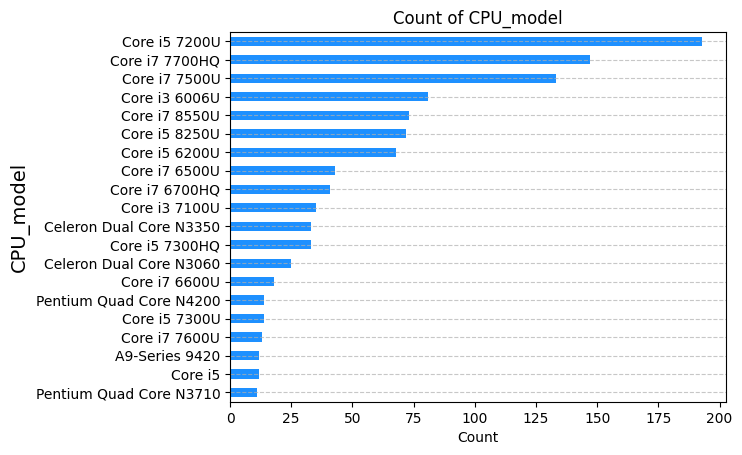

Se observa un claro dominio de los procesadores Intel en el mercado de laptops, destacando los modelos Core i5-7200U, Core i7-7700HQ y Core i7-7500U como los más representativos. Esto sugiere una preferencia por procesadores de gama media-alta, conocidos por su buen equilibrio entre rendimiento y costo.


In [51]:
df['CPU_model'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh',color='dodgerblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Count of CPU_model')
plt.xlabel('Count')
plt.ylabel('CPU_model',fontsize=14)
plt.show()
print('''Se observa un claro dominio de los procesadores Intel en el mercado de laptops, destacando los modelos Core i5-7200U, Core i7-7700HQ y Core i7-7500U como los más representativos. Esto sugiere una preferencia por procesadores de gama media-alta, conocidos por su buen equilibrio entre rendimiento y costo.''')


### **Conclusion**

Este análisis exploratorio se centró en identificar las características clave que impactan el precio de las laptops y cómo se distribuyen ciertos atributos, como la RAM, el procesador y el almacenamiento, en el mercado.

Se observó una correlación entre el precio de las laptops y factores como la memoria RAM, la resolución de pantalla y la frecuencia del procesador. Además, se evidenció una tendencia hacia laptops con precios más bajos, especialmente en el rango de 500 a 1500 euros.

Estos resultados son relevantes para los fabricantes que buscan optimizar sus productos de acuerdo con las demandas del mercado. También proporcionan a los consumidores información valiosa para tomar decisiones más informadas sobre qué características afectan el precio.

A pesar de los hallazgos, la falta de datos sobre la percepción y satisfacción de los consumidores limita la comprensión completa de cómo estas características influyen en las decisiones de compra.

Para futuras investigaciones, sería útil incorporar datos sobre las calificaciones de los usuarios para comprender mejor cómo perciben el valor de cada laptop.